# DISSERTAÇÃO DE MESTRADO

## Gráficos que irão subsidiar meu referencial

@author: Guilherme Nogueira

## Importações

In [3]:
# Gerais
import numpy as np
import pandas as pd
from datetime import date

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

## Figura 1 - Oferta Interna de Energia por Fonte, em 2024

In [ ]:
# Lendo dos dados
df_1 = pd.read_excel("../data/graphs/dados-epe-graficos.xlsx", sheet_name="Figura 1", skiprows=1)

# Mantém apenas as primeiras 10 linhas
df_1 = df_1.iloc[:11]

print(df_1)

                          Fonte   Valor  Participação
0          Petróleo e derivados  109586      0.340339
1   Derivados da cana-de-açúcar   53715      0.166821
2                    Hidráulica   37271      0.115752
3                   Gás natural   30970      0.096183
4        Lenha e carvão vegetal   27372      0.085009
5             Outras renováveis   26167      0.081266
6        Carvão mineral e coque   14431      0.044818
7                        Eólica    9258      0.028752
8                         Solar    7229      0.022451
9                 Urânio (U3O8)    4156      0.012907
10        Outras não renováveis    1836      0.005702


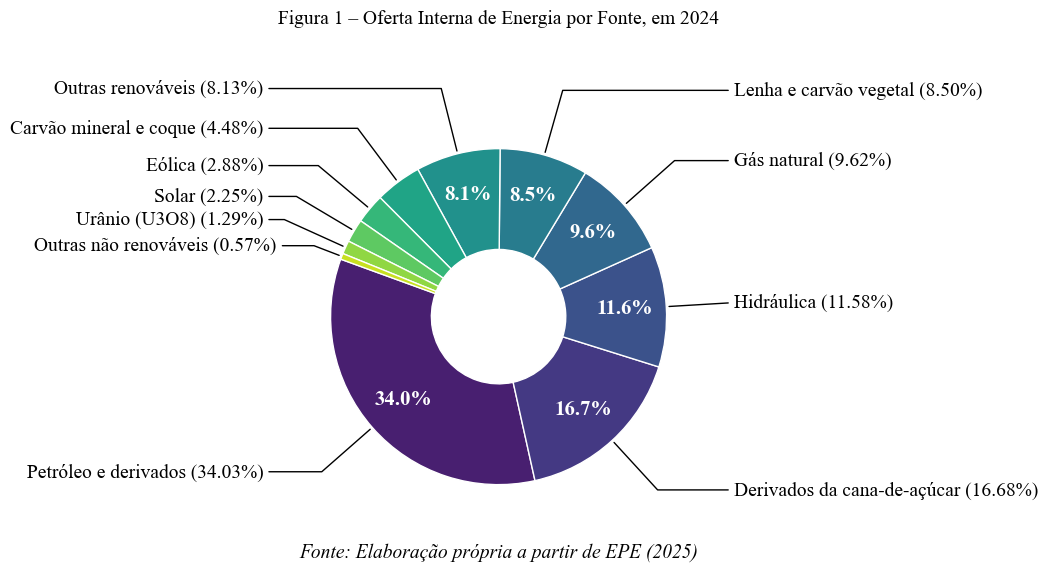

In [ ]:
# Configuração da fonte Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
TAMANHO_FONTE = 14

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))
colors = sns.color_palette('viridis', len(df_1))

# Gráfico de rosca
wedges, _ = ax.pie(
    df_1['Participação'], 
    wedgeprops=dict(width=0.6, edgecolor='w'), 
    startangle=160, 
    colors=colors
)

for i, p in enumerate(wedges):
    # Cálculo de ângulos e coordenadas
    fonte_atual = df_1.iloc[i]['Fonte']
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y, x = np.sin(np.deg2rad(ang)), np.cos(np.deg2rad(ang))
    
    # Rótulo Externo: Fonte (0,00%)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    label_externo = f"{fonte_atual} ({df_1.iloc[i]['Participação']*100:.2f}%)"
    
    # --- AJUSTE ESPECÍFICO ---
    off_x = 1.4 * np.sign(x)
    off_y = 1.4 * y
    
    if fonte_atual == 'Outras não renováveis':
        off_y -= 0.08  # Move o texto um pouco mais para baixo no eixo Y
        off_x += 0.08  # Afasta levemente para a direita se necessário

    ax.annotate(label_externo, xy=(x, y), xytext=(off_x, off_y),
                horizontalalignment=horizontalalignment, verticalalignment='center',
                arrowprops=dict(arrowstyle="-", color='black', 
                connectionstyle=f"angle,angleA=0,angleB={ang}"),
                fontsize=TAMANHO_FONTE)
    
    # 2. Lógica para Porcentagem Interna (Apenas se > 5%)
    if df_1.iloc[i]['Participação'] > 0.05:
        # Posiciona o texto no centro da fatia (raio ~0.75 para um donut de width 0.5)
        pos_y, pos_x = 0.75 * np.sin(np.deg2rad(ang)), 0.75 * np.cos(np.deg2rad(ang))
        ax.text(pos_x, pos_y, f"{df_1.iloc[i]['Participação']*100:.1f}%", 
                ha='center', va='center', color='white', fontweight='bold', fontsize=TAMANHO_FONTE+1)
...

plt.title("Figura 1 – Oferta Interna de Energia por Fonte, em 2024", fontsize=TAMANHO_FONTE, fontweight='normal', pad=60, family='serif')
fig.text(0.5, 0.1, "Fonte: Elaboração própria a partir de EPE (2025)", ha='center', fontsize=TAMANHO_FONTE, family='serif', style='italic')

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.15)
plt.savefig('../data/graphs/figura1.png', dpi=300, bbox_inches='tight')
plt.show()

## Figura 2 - Oferta Interna de Energia Elétrica por Fonte, em 2024

In [6]:
# Lendo dos dados
df_2 = pd.read_excel("../data/graphs/dados-epe-graficos.xlsx", sheet_name="Figura 2", skiprows=1)

# Mantém apenas as primeiras 10 linhas
df_2 = df_2.iloc[:12]

print(df_2)

                     Fonte  Participação
0               Hidráulica         0.553
1                   Eólica         0.141
2                    Solar         0.093
3              Gás natural         0.063
4           Bagaço de cana         0.049
5    Licor preto (lixívia)         0.023
6                  Nuclear         0.021
7       Importação líquida         0.015
8   Outras não renováveis*         0.015
9             Carvão vapor         0.013
10     Outras renováveis**         0.009
11             Óleo diesel         0.006


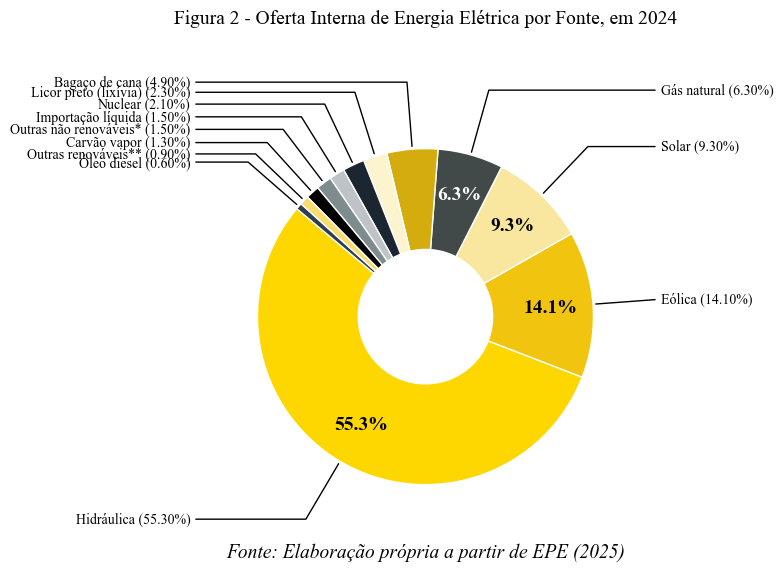

In [22]:
# Configuração Padrão Acadêmico
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
TAMANHO_FONTE = 10

# Mapeamento de cores: Amarelos para Renováveis, Cinzas/Preto para Não Renováveis
def get_color(fonte):
    color_map = {
        'Hidráulica': '#FFD700', 'Eólica': '#F1C40F', 'Solar': '#F9E79F', 
        'Bagaço de cana': '#D4AC0D', 'Licor preto (lixívia)': '#FCF3CF', 
        'Outras renováveis**': '#F7DC6F',
        'Gás natural': '#424949', 'Nuclear': '#1B2631', 
        'Outras não renováveis*': '#7F8C8D', 'Carvão vapor': '#000000', 
        'Óleo diesel': '#2C3E50', 'Importação líquida': '#BDC3C7'
    }
    return color_map.get(fonte, '#D3D3D3')

colors = [get_color(f) for f in df_2['Fonte']]

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))

# Gráfico de rosca
wedges, _ = ax.pie(df_2['Participação'], wedgeprops=dict(width=0.6, edgecolor='w'), startangle=140, colors=colors)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y, x = np.sin(np.deg2rad(ang)), np.cos(np.deg2rad(ang))
    
    # Rótulo Externo: Fonte (0,00%)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    label_externo = f"{df_2.iloc[i]['Fonte']} ({df_2.iloc[i]['Participação']*100:.2f}%)"
    
    ax.annotate(label_externo, xy=(x, y), xytext=(1.4 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, verticalalignment='center',
                arrowprops=dict(arrowstyle="-", color='black', 
                                connectionstyle=f"angle,angleA=0,angleB={ang}"),
                fontsize=TAMANHO_FONTE)
    
    # Porcentagem Interna (> 5%) com contraste automático
    if df_2.iloc[i]['Participação'] > 0.05:
        pos_y, pos_x = 0.75 * np.sin(np.deg2rad(ang)), 0.75 * np.cos(np.deg2rad(ang))
        cor_fatia = colors[i].upper()
        cor_texto = 'white' if cor_fatia in ['#000000', '#424949', '#1B2631', '#2C3E50'] else 'black'
        
        ax.text(pos_x, pos_y, f"{df_2.iloc[i]['Participação']*100:.1f}%", 
                ha='center', va='center', color=cor_texto, fontweight='bold', fontsize=TAMANHO_FONTE+4)

plt.title("Figura 2 - Oferta Interna de Energia Elétrica por Fonte, em 2024", fontsize=TAMANHO_FONTE+4, fontweight='normal', pad=60, family='serif')
fig.text(0.5, 0.1, "Fonte: Elaboração própria a partir de EPE (2025)", ha='center', fontsize=TAMANHO_FONTE+4, family='serif', style='italic')

plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)
plt.savefig('../data/graphs/figura2.png', dpi=300, bbox_inches='tight')
plt.show()

## Figura 3 - Emissões Totais de CO₂ equivalente (MtCO₂e) por Setor no Brasil em 2024

In [173]:
# Lendo dos dados
df_3 = pd.read_excel("../data/graphs/dados-epe-graficos.xlsx", sheet_name="Figura 3", skiprows=1)

# Mantém apenas as primeiras 10 linhas
df_3 = df_3.iloc[:4]

# Renomeando
df_3.rename(columns={'Fonte': 'Setor', 'Participação': 'Emissões', '%': 'Pct'}, inplace=True)

print(df_3)

             Setor  Emissões       Pct
0      Transportes     214.3  0.496870
1       Indústrias      74.8  0.173429
2      Residências      18.6  0.043125
3  Outros setores*     123.6  0.286575


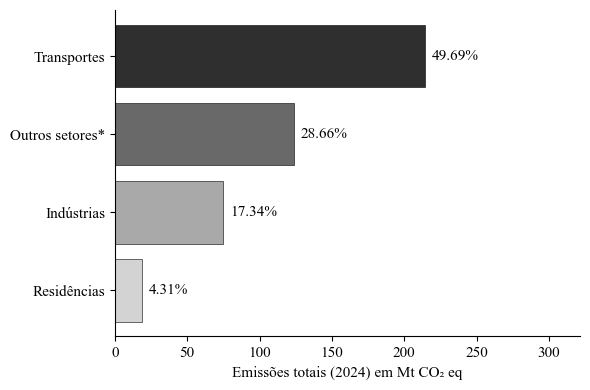

In [190]:
# 1. Ordenando o DataFrame da menor para a maior emissão
df_3 = df_3.sort_values(by='Emissões', ascending=True)

# Configuração Técnica para Word (8cm e Times New Roman 10)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
TAMANHO_FONTE = 11

# 8cm ≈ 3.15 polegadas
fig, ax = plt.subplots(figsize=(6, 4)) 

# Paleta na escala de cinza: do mais claro (menor) para o mais escuro (maior)
colors = ['#D3D3D3', '#A9A9A9', '#696969', '#2F2F2F']

# Gráfico de barras horizontais
bars = ax.barh(df_3['Setor'], df_3['Emissões'], color=colors, edgecolor='black', linewidth=0.4)

# Rótulos de dados: apenas a porcentagem (0,00%)
for i, bar in enumerate(bars):
    width = bar.get_width()
    pct = df_3.iloc[i]['Pct'] 
    label = f'{pct*100:.2f}%'
    
    ax.text(width + 5, bar.get_y() + bar.get_height()/2,
            label, ha='left', va='center', fontsize=TAMANHO_FONTE)

# Formatação de Eixos e Limpeza Visual
ax.set_xlabel('Emissões totais (2024) em Mt CO₂ eq', fontsize=TAMANHO_FONTE)
ax.tick_params(axis='both', labelsize=TAMANHO_FONTE)
ax.set_xlim(0, max(df_3['Emissões']) * 1.5) # Espaço para o rótulo %

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/graphs/figura3.svg', dpi=600, bbox_inches='tight')
plt.show()

## Figura 4 - Distribuição da Participação de Fontes de Energia no Setor de Transportes em 2024

In [178]:
# Lendo dos dados
df_4 = pd.read_excel("../data/graphs/dados-epe-graficos.xlsx", sheet_name="Figura 4", skiprows=1, usecols=[0,2])

# Mantém apenas as primeiras 10 linhas
df_4 = df_4.iloc[:9]

# Renomeando
df_4.rename(columns={'Fonte': 'Fonte', '%': 'Participação'}, inplace=True)

print(df_4)

                 Fonte  Participação
0          Óleo diesel      0.425328
1  Gasolina automotiva      0.259266
2       Álcool etílico      0.194319
3            Biodiesel      0.060888
4            Querosene      0.035134
5          Gás natural      0.015110
6     Óleo combustível      0.007680
7         Eletricidade      0.001941
8  Gasolina de aviação      0.000334


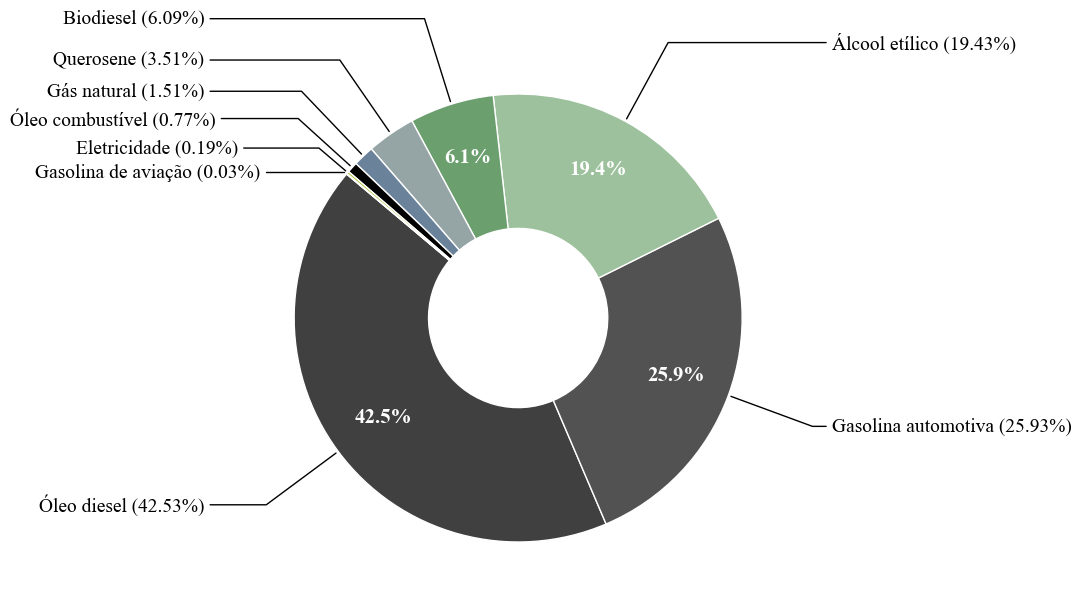

In [191]:
# Configuração Padrão Acadêmico
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

def get_color(fonte):
    color_map = {
        'Óleo diesel': '#404040', 
        'Gasolina automotiva': '#535253',
        'Gasolina de aviação': '#C0392B', 
        'Querosene': '#95A5A6', 
        'Gás natural': '#6a829a', 
        'Óleo combustível': '#000000', 
        'Eletricidade': '#b2c64c', 
        'Álcool etílico': '#9cc19c', 
        'Biodiesel': '#6b9f6e', 
    }
    return color_map.get(fonte, '#D3D3D3')

colors = [get_color(f) for f in df_4['Fonte']]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

# Gráfico de rosca
wedges, _ = ax.pie(df_4['Participação'], wedgeprops=dict(width=0.6, edgecolor='w'), startangle=140, colors=colors)

for i, p in enumerate(wedges):
    fonte_atual = df_4.iloc[i]['Fonte']
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y, x = np.sin(np.deg2rad(ang)), np.cos(np.deg2rad(ang))
    
    # Rótulo Externo: Fonte (0,00%)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    label_externo = f"{fonte_atual} ({df_4.iloc[i]['Participação']*100:.2f}%)"
    
    # --- AJUSTE ESPECÍFICO PARA GASOLINA DE AVIAÇÃO ---
    # Aumentamos o deslocamento em Y para "empurrar" o texto para baixo
    off_x = 1.4 * np.sign(x)
    off_y = 1.4 * y
    
    if fonte_atual == 'Gasolina de aviação':
        off_y -= 0.25  # Move o texto um pouco mais para baixo no eixo Y
        off_x += 0.25  # Afasta levemente para a direita se necessário

    if fonte_atual == 'Eletricidade':
        off_y -= 0.15  # Move o texto um pouco mais para baixo no eixo Y
        off_x += 0.15  # Afasta levemente para a direita se necessário

    if fonte_atual == 'Óleo combustível':
        off_y -= 0.05  # Move o texto um pouco mais para baixo no eixo Y
        off_x += 0.05  # Afasta levemente para a direita se necessário
    
    ax.annotate(label_externo, xy=(x, y), xytext=(off_x, off_y),
                horizontalalignment=horizontalalignment, verticalalignment='center',
                arrowprops=dict(arrowstyle="-", color='black', 
                connectionstyle=f"angle,angleA=0,angleB={ang}"),
                fontsize=14)
    
    # Porcentagem Interna (> 5%) com contraste automático
    if df_4.iloc[i]['Participação'] > 0.05:
        pos_y, pos_x = 0.75 * np.sin(np.deg2rad(ang)), 0.75 * np.cos(np.deg2rad(ang))
        cor_texto = 'white'
        
        ax.text(pos_x, pos_y, f"{df_4.iloc[i]['Participação']*100:.1f}%", 
                ha='center', va='center', color=cor_texto, fontweight='bold', fontsize=15)

plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)
plt.savefig('../data/graphs/figura4.svg', dpi=600, bbox_inches='tight')
plt.show()

## Figura 5 - Evolução da participação de fontes renováveis na oferta interna de energia (2013–2024)

In [184]:
# Lendo dos dados
df_5 = pd.read_excel("../data/graphs/dados-epe-graficos.xlsx", sheet_name="Figura 5", usecols=[0,1,2,3])

print(df_5)

     Ano  Energia Não Renovável  Energia Renovável   Total
0   2003                 112669              88206  200875
1   2004                 119348              93642  212990
2   2005                 120619              97317  217936
3   2006                 123737             101884  225621
4   2007                 128321             109690  238011
5   2008                 135822             116037  251860
6   2009                 128136             115074  243209
7   2010                 147569             121203  268771
8   2011                 152529             119809  272338
9   2012                 163365             120242  283607
10  2013                 176166             120640  296806
11  2014                 184724             121391  306115
12  2015                 175879             124521  300400
13  2016                 162787             126488  289276
14  2017                 166827             127826  294654
15  2018                 157768             133407  2911

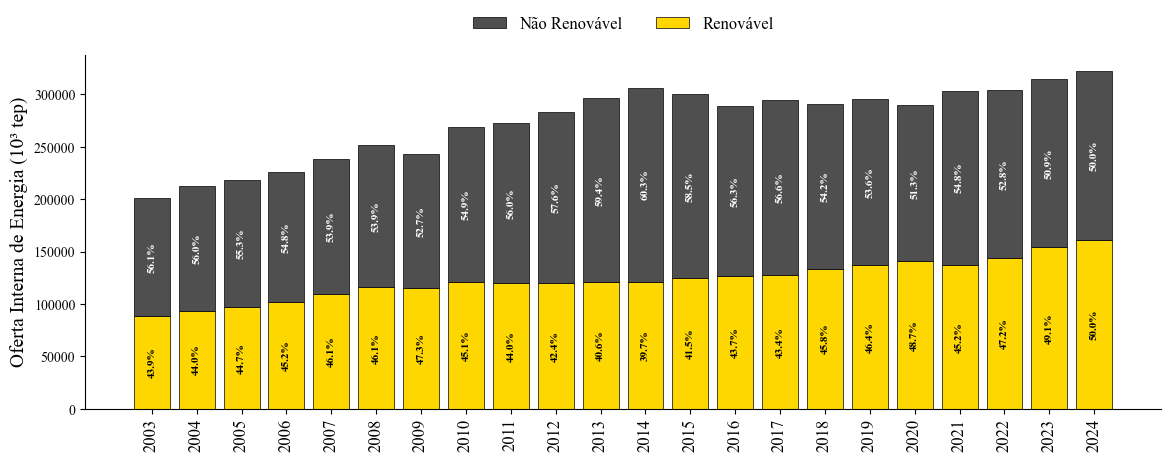

In [192]:
TAMANHO_FONTE = 14

# Configuração Padrão Acadêmico
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

largura_pol = 30 / 2.54
altura_pol = largura_pol * 0.4 # Aumentei levemente a altura para facilitar a leitura dos textos internos
fig, ax = plt.subplots(figsize=(largura_pol, altura_pol))

# Cores consistentes
cor_nao_renovavel = '#4F4F4F' 
cor_renovavel = '#FFD700'

# Dados para o cálculo
anos = df_5['Ano']
renovavel = df_5['Energia Renovável']
nao_renovavel = df_5['Energia Não Renovável']
total = renovavel + nao_renovavel

# Plotagem das barras empilhadas
bar1 = ax.bar(anos, renovavel, label='Renovável', color=cor_renovavel, edgecolor='black', linewidth=0.5)
bar2 = ax.bar(anos, nao_renovavel, bottom=renovavel, label='Não Renovável', color=cor_nao_renovavel, edgecolor='black', linewidth=0.5)

# Inserindo as porcentagens dentro das barras
for i in range(len(anos)):
    # Porcentagem da Renovável
    pct_ren = (renovavel[i] / total[i]) * 100
    ax.text(anos[i], renovavel[i] / 2, f'{pct_ren:.1f}%', 
            ha='center', va='center', color='black', fontsize=TAMANHO_FONTE-6, fontweight='bold', rotation=90)
    
    # Porcentagem da Não Renovável
    pct_n_ren = (nao_renovavel[i] / total[i]) * 100
    ax.text(anos[i], renovavel[i] + (nao_renovavel[i] / 2), f'{pct_n_ren:.1f}%', 
            ha='center', va='center', color='white', fontsize=TAMANHO_FONTE-6, fontweight='bold', rotation=90)

# Título e Eixos
ax.set_ylabel('Oferta Interna de Energia (10³ tep)', fontsize=TAMANHO_FONTE)
ax.set_xticks(anos)
ax.set_xticklabels(anos, rotation=90, fontsize=TAMANHO_FONTE-2)

# Legenda invertida
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), fontsize=TAMANHO_FONTE-2, frameon=False, loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=2)

# Limpeza estética
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/graphs/figura5.svg', dpi=600, bbox_inches='tight')
plt.show()